<a href="https://colab.research.google.com/github/HuseynA28/FaceRecognitionMachineLearning/blob/main/feactureengineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
### Eigen mean

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/FaceRecognition/OpenCV/data/data_image_pixel.csv')

In [ ]:
df=df_.copy()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Gender
0,0.588235,0.580392,0.588235,0.588235,0.588235,0.588235,0.580392,0.588235,0.588235,0.588235,...,0.592157,0.596078,0.596078,0.596078,0.596078,0.596078,0.592157,0.596078,0.576471,Female
1,0.596078,0.588235,0.588235,0.588235,0.588235,0.580392,0.576471,0.588235,0.588235,0.584314,...,0.282353,0.270588,0.278431,0.278431,0.282353,0.270588,0.274510,0.278431,0.368627,Male
2,0.588235,0.588235,0.588235,0.588235,0.584314,0.588235,0.584314,0.588235,0.584314,0.588235,...,0.474510,0.474510,0.478431,0.478431,0.482353,0.482353,0.482353,0.482353,0.556863,Male
3,0.580392,0.588235,0.584314,0.588235,0.588235,0.584314,0.588235,0.592157,0.580392,0.592157,...,0.584314,0.592157,0.584314,0.592157,0.588235,0.592157,0.576471,0.592157,0.584314,Female
4,0.588235,0.588235,0.588235,0.584314,0.584314,0.584314,0.588235,0.584314,0.592157,0.588235,...,0.560784,0.560784,0.560784,0.556863,0.560784,0.564706,0.552941,0.568627,0.580392,Male


In [ ]:
values =df.drop(["Gender"],axis=1).values

In [ ]:
values

array([[0.58823529, 0.58039216, 0.58823529, ..., 0.59215686, 0.59607843,
        0.57647059],
       [0.59607843, 0.58823529, 0.58823529, ..., 0.2745098 , 0.27843137,
        0.36862745],
       [0.58823529, 0.58823529, 0.58823529, ..., 0.48235294, 0.48235294,
        0.55686275],
       ...,
       [0.58823529, 0.58823529, 0.58823529, ..., 0.59607843, 0.6       ,
        0.58431373],
       [0.58823529, 0.58823529, 0.58823529, ..., 0.58823529, 0.58823529,
        0.58823529],
       [0.58823529, 0.58823529, 0.58823529, ..., 0.59607843, 0.58431373,
        0.58039216]])

In [ ]:
mean_value = np.mean(values, axis=0)

In [ ]:
mean_value.shape

(10000,)

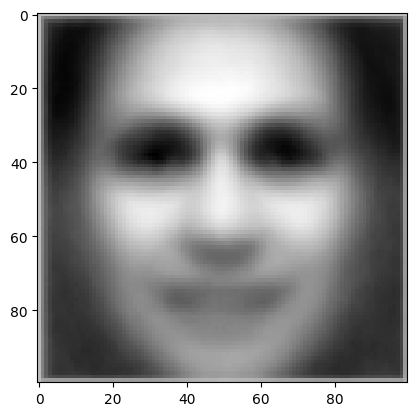

In [ ]:
plt.imshow(mean_value.reshape(100, 100),cmap='gray')

**Subtract mean value for the data **

In [ ]:
value_clean = values - mean_value

# **PCA**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pca =PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(value_clean)

PCA(whiten=True)

In [ ]:
exp_df = pd.DataFrame({
    "explained_var": pca.explained_variance_ratio_,
    "cum_explained_var": pca.explained_variance_ratio_.cumsum(),
    "eigen_value": pca.explained_variance_,
    "pricipal_components": np.arange(1, len(pca.explained_variance_ratio_) + 1)
})

In [ ]:
exp_df.head()

,explained_var,cum_explained_var,eigen_value,pricipal_components
0,0.264597,0.264597,112.356058,1
1,0.124153,0.388751,52.719135,2
2,0.112334,0.501084,47.700236,3
3,0.046194,0.547279,19.615573,4
4,0.030754,0.578032,13.058990,5


In [ ]:
exp_df.set_index("pricipal_components", inplace=True)

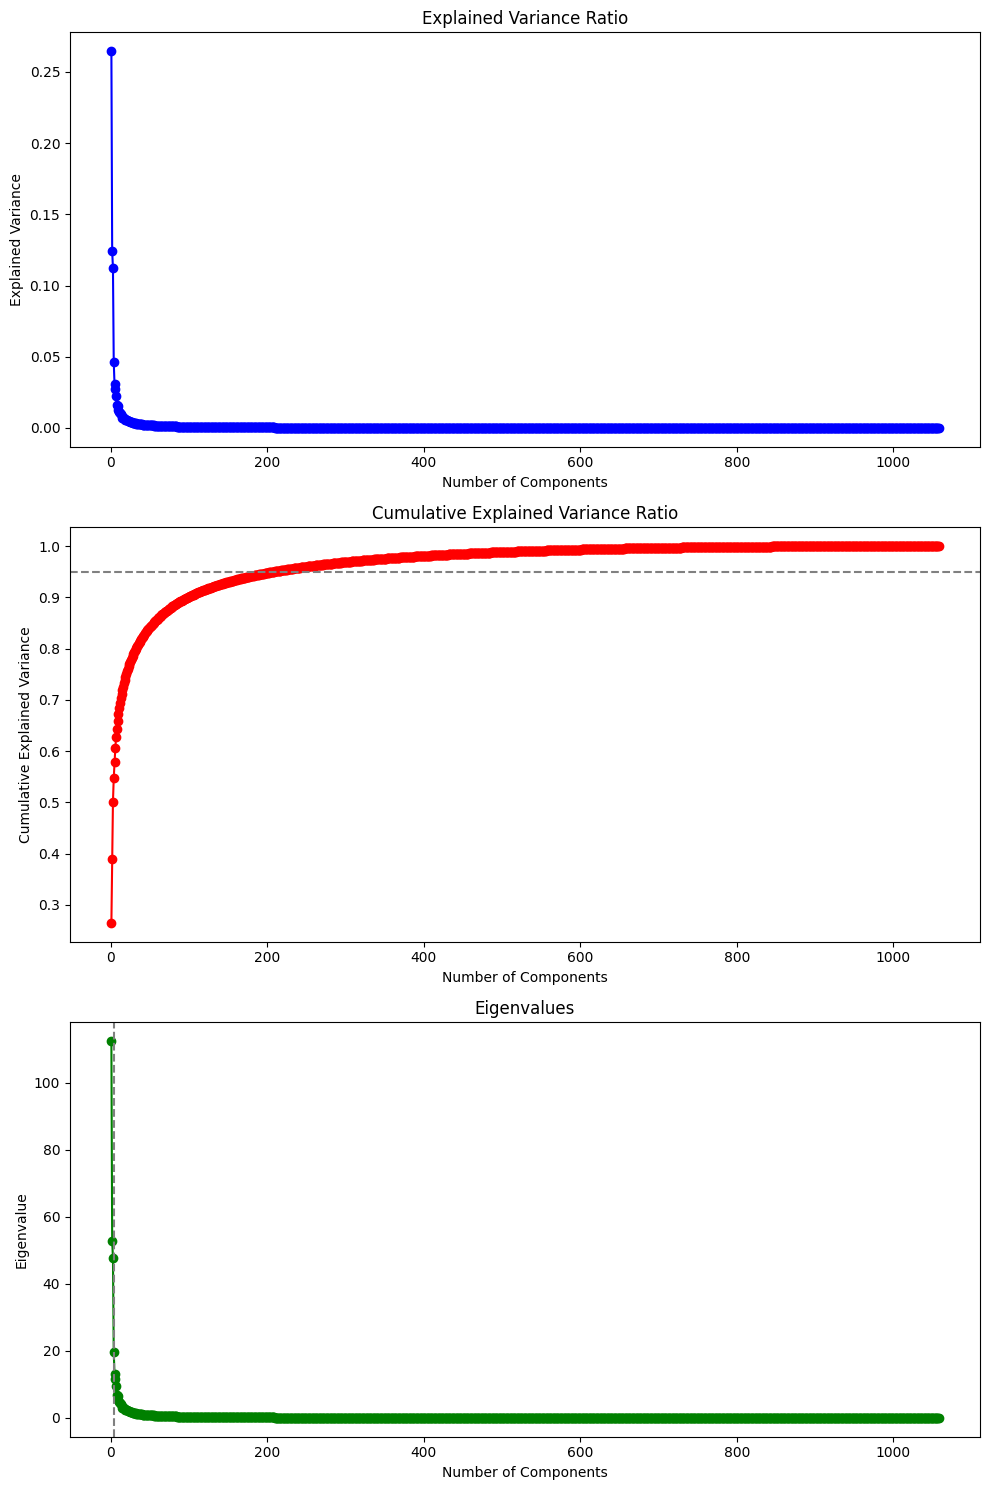

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
ax[0].plot(exp_df["explained_var"], marker='o', linestyle='-', color='b')
ax[0].set_title('Explained Variance Ratio')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Explained Variance')


ax[1].plot(exp_df["cum_explained_var"], marker='o', linestyle='-', color='r')
ax[1].set_title('Cumulative Explained Variance Ratio')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cumulative Explained Variance')

ax[1].axhline(y=0.95, color='gray', linestyle='--')

ax[2].plot(exp_df["eigen_value"], marker='o', linestyle='-', color='g')
ax[2].set_title('Eigenvalues')
ax[2].set_xlabel('Number of Components')
ax[2].set_ylabel('Eigenvalue')

ax[2].axvline(x=4, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


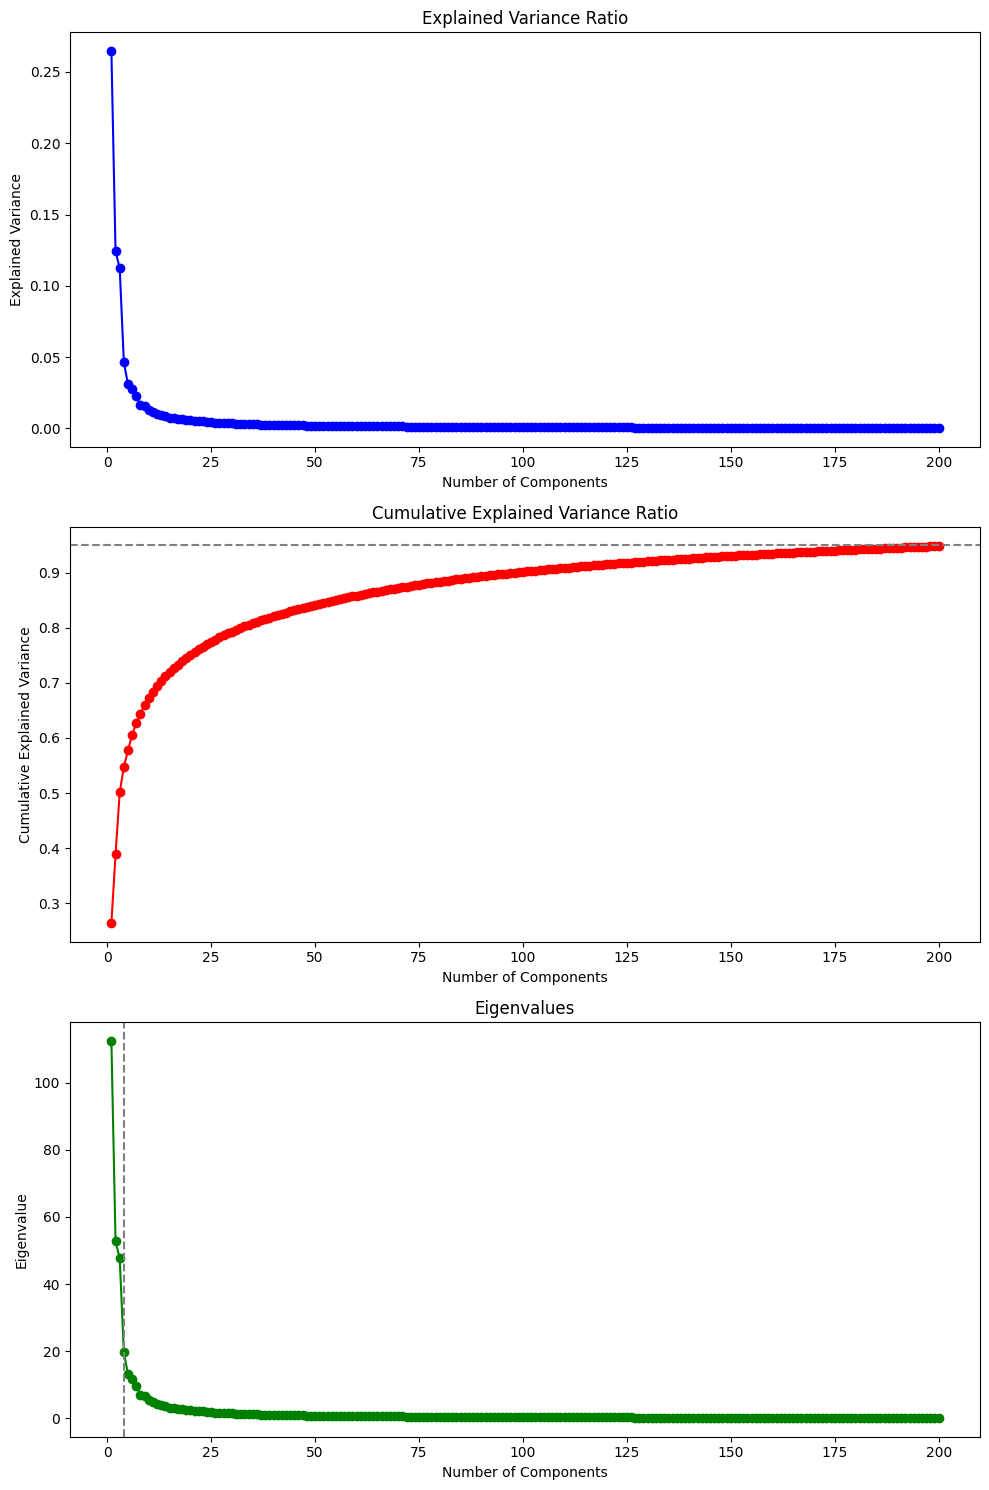

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 15))
ax[0].plot(exp_df["explained_var"].head(200), marker='o', linestyle='-', color='b')
ax[0].set_title('Explained Variance Ratio')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Explained Variance')


ax[1].plot(exp_df["cum_explained_var"].head(200), marker='o', linestyle='-', color='r')
ax[1].set_title('Cumulative Explained Variance Ratio')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cumulative Explained Variance')

ax[1].axhline(y=0.95, color='gray', linestyle='--')

ax[2].plot(exp_df["eigen_value"].head(200), marker='o', linestyle='-', color='g')
ax[2].set_title('Eigenvalues')
ax[2].set_xlabel('Number of Components')
ax[2].set_ylabel('Eigenvalue')

ax[2].axvline(x=4, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
pca_100 = PCA(n_components=100, whiten=True, svd_solver='auto')
pca_data = pca_100.fit_transform(value_clean)

In [ ]:
pca_data.shape

(1058, 100)

# **Saving models and data**

In [ ]:
target=df_["Gender"].values
np.savez("/content/drive/MyDrive/FaceRecognition/OpenCV/data/data_pca_100_target", pca_data, y=target)

In [ ]:
pca_dict = {
    "mean": mean_value,
    "pca": pca_100
}

In [ ]:
import pickle

In [ ]:
pickle.dump(pca_dict, open("/content/drive/MyDrive/FaceRecognition/OpenCV/data/pca_dict.pkl", "wb"))